In [1]:
import sys

sys.path.append("../")

import pandas as pd
import numpy as np

from terminal.Extensions.MT5Ext import MT5Ext
from terminal.Extensions.Range import Range

In [4]:
data = np.load("./data/ticks_WIN$N_2024_1.npz", allow_pickle=True)["ticks"]

array([(1704186056, 149365., 125000., 135250., 25, 1704186056135, 312, 25.),
       (1704186056, 149365., 125000., 135250., 10, 1704186056135, 312, 10.),
       (1704186056, 149365., 125000., 135250.,  3, 1704186056135, 312,  3.),
       ...,
       (1706725886, 127990., 127990., 127990.,  3, 1706725886135, 312,  3.),
       (1706725886, 127990., 127990., 127990.,  2, 1706725886135, 312,  2.),
       (1706725886, 127990., 127990., 127990., 57, 1706725886135, 312, 57.)],
      dtype=[('time', '<i8'), ('bid', '<f8'), ('ask', '<f8'), ('last', '<f8'), ('volume', '<u8'), ('time_msc', '<i8'), ('flags', '<u4'), ('volume_real', '<f8')])

In [5]:
ohlc = MT5Ext.create_ohlc_from_ticks(data, "10s")

In [6]:
range = Range(50, ohlc.index, ohlc["close"], ohlc["real_volume"])

In [7]:
bricks = pd.DataFrame(range.bricks)
bricks.index = bricks.time
bricks.drop(columns=["time"], inplace=True)

<Axes: xlabel='time'>

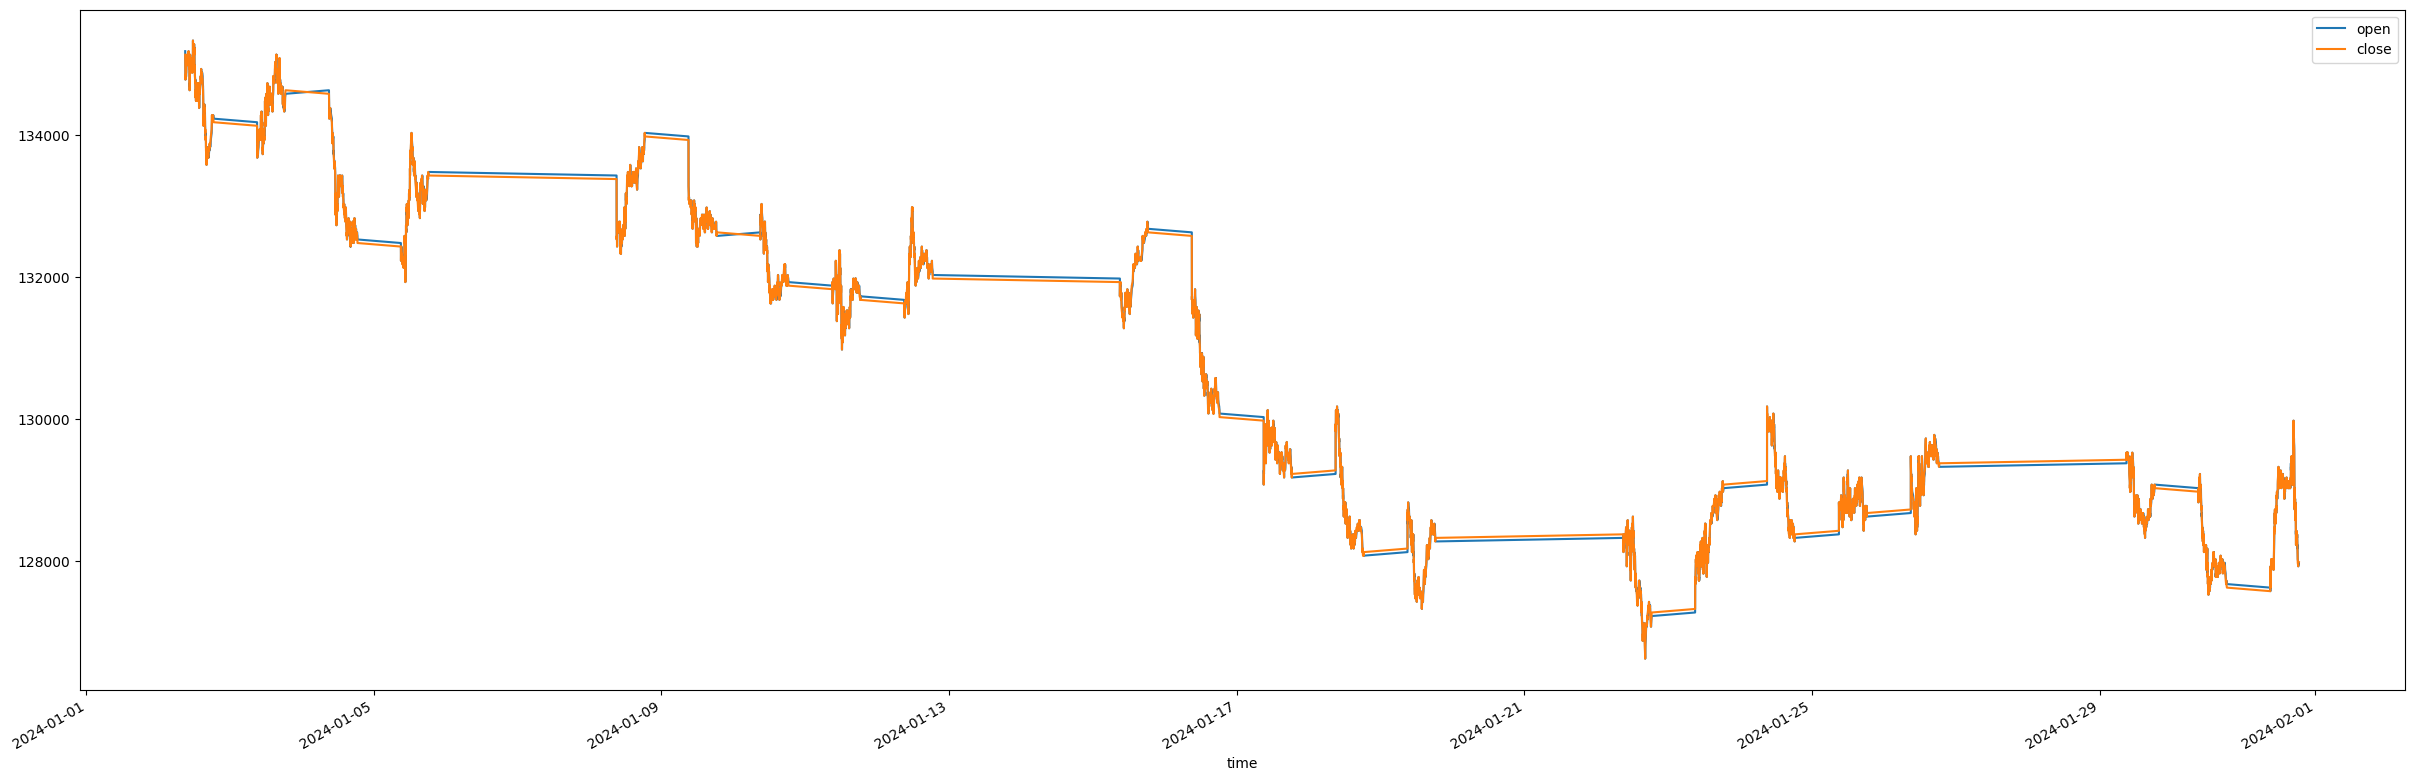

In [8]:
bricks.iloc[:][["open", "close"]].plot(figsize=(30,10))